<a href="https://colab.research.google.com/github/irenechau31/PYTHON/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<Axes: >

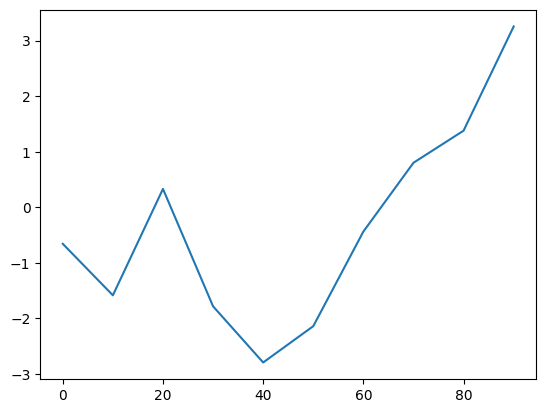

In [33]:
s=pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

<Axes: >

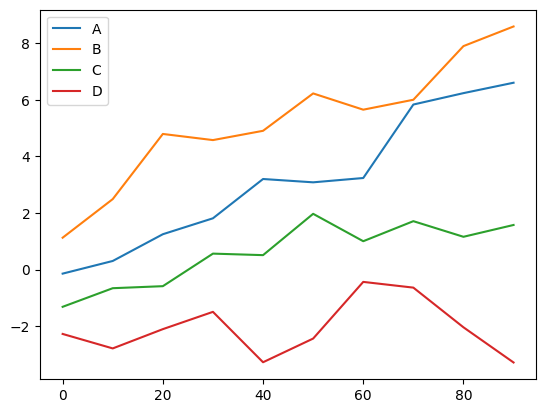

In [34]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'],index=np.arange(0,100,10))
df.plot()


xlim and ylim to control the view of the data, as well as title and label to describe the contents of the plot


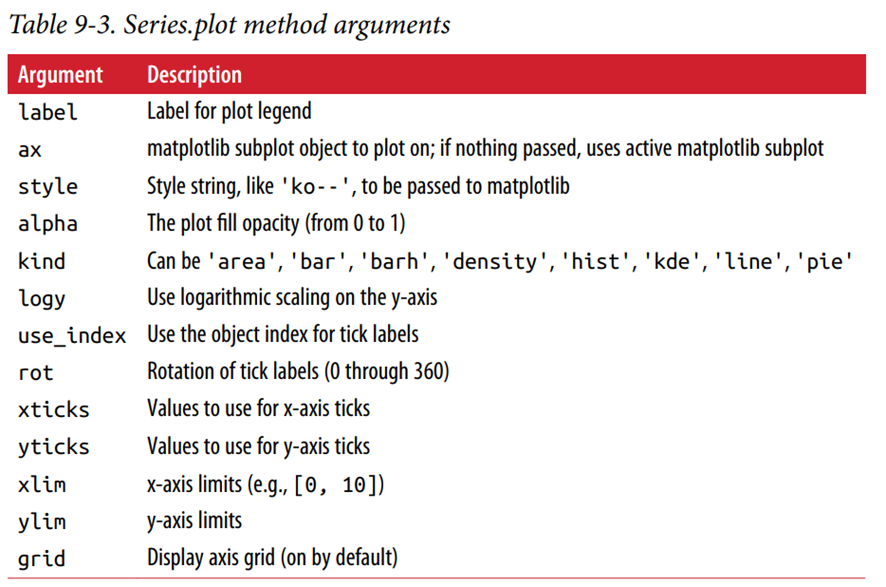

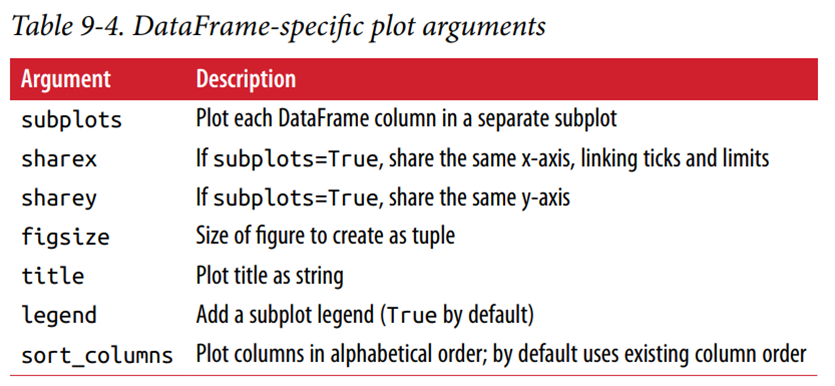

Make vertical bar plots with plot.bar and horizontal bar plots with plot.barh
color=‘k’ and alpha=0.7 means black with 70% opacity


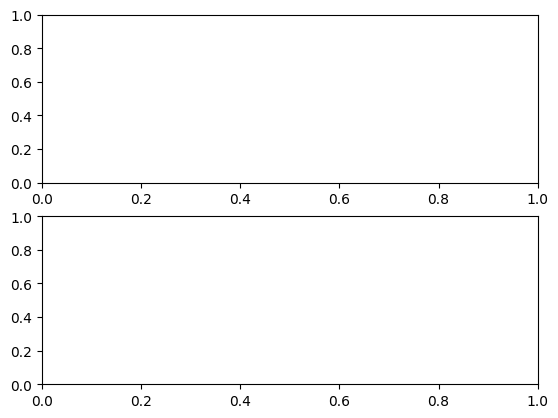

In [35]:
fig,axes=plt.subplots(2,1)

In [36]:
data=pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [37]:
data.plot.bar(ax=axes=[0],color='k',alpha=0.7)

SyntaxError: ignored

In [39]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<Axes: >


HISTOGRAMS PLOT

In [40]:
df=pd.DataFrame(np.random.randn(100,4),columns=pd.Index(['A','B','C','D'], name='Normal'))

<Axes: ylabel='Frequency'>

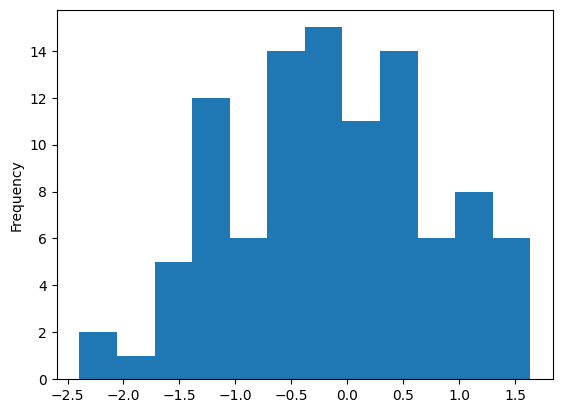

In [41]:
fig=plt.figure()
df['B'].plot.hist(bins=12)

<Axes: ylabel='Density'>

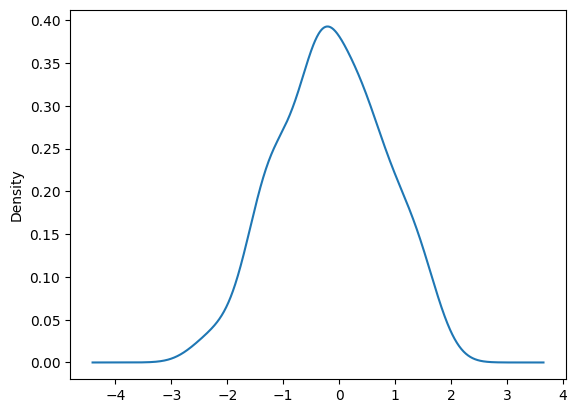

In [42]:
fig=plt.figure()
df['B'].plot.density()

Kernel Density Plots using seaborn
Seaborn can plot histograms and density plots. First, import seaborn via
   import seaborn as sns




In [43]:
import seaborn as sns

In [45]:
comp1=np.random.normal(0,1,size=200)
comp2=np.random.normal(10,2,size=200)
values=pd.Series(np.concatenate([comp1,comp2]))

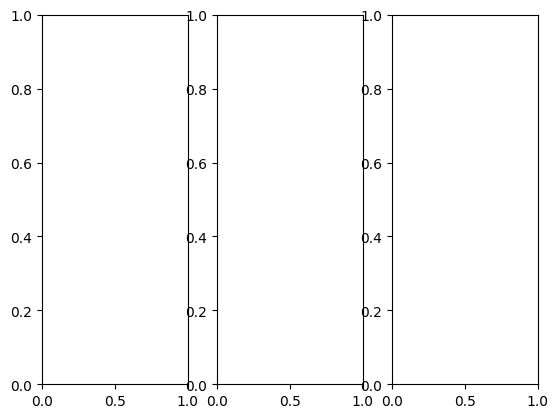

In [50]:
fig, (ax1, ax2, ax3)=plt.subplots(1,3)

In [52]:
sns.kdeplot(values,bw_adjust=0.2, ax=ax1), set(title='bw_adjust=0.2')
sns.kdeplot(values,bw_adjust=1, ax=ax2), set(title='bw_adjust=1')
sns.kdeplot(values,bw_adjust=1.5, ax=ax3), set(title='bw_adjust=1.5')
plt.subplots_adjust(wspace=1)

TypeError: ignored

<Axes: ylabel='Count'>

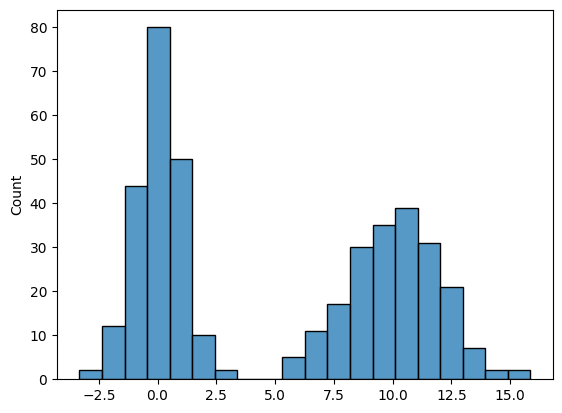

In [53]:
plt.subplots(1,1)
sns.histplot(values,bins=20)

In [55]:
import statsmodels.api as sm

In [57]:
macro=sm.datasets.macrodata.load_pandas().data

In [58]:
data=macro[['cpi','m1','tbilrate','unemp']]

In [60]:
trans_data=np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


(<Figure size 640x480 with 1 Axes>, <Axes: >)

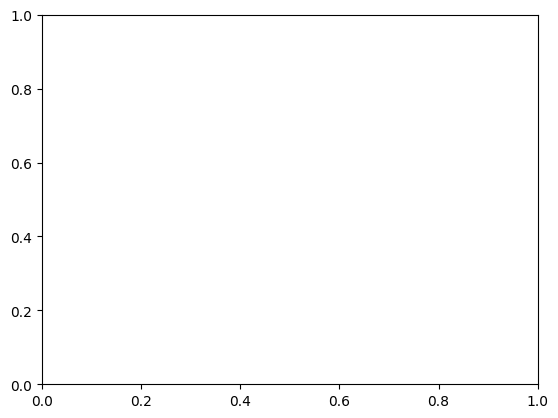

In [61]:
plt.subplots(1,1)

ValueError: ignored

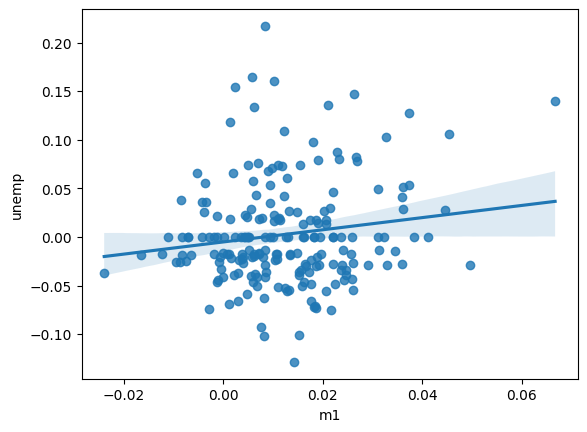

In [62]:
sns.regplot(x='m1', y='unemp',data=trans_data)
plt.title('Change in log %S versus log %S'%('m1', 'unemp'))

In [78]:

import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
yf.pdr_override()

In [79]:
#Import stock price data
all_data = {ticker: pdr.get_data_yahoo(ticker, "2022-1-2", "2023-11-21")
           for ticker in [ 'AAPL','IBM','MSFT','GOOG' ]}
price = pd.DataFrame({ticker: data[ 'Adj Close' ]
                      for ticker, data in all_data.items()})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [80]:
#compute log return, defined as log(price_[ t ]/price[ t-1 ])
returns = np.log(1+price.pct_change())

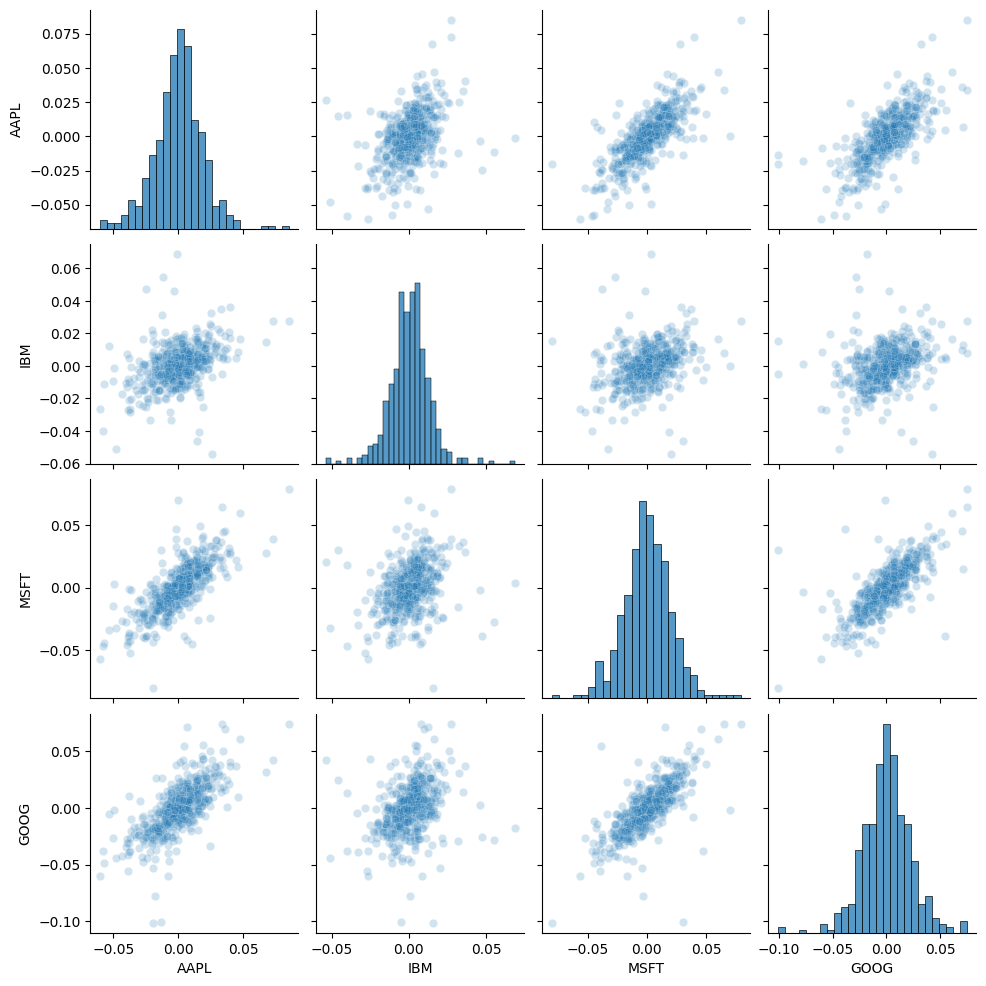

In [81]:
#Create a plot matrix for all four stocks using a function in seaborn package
sns.pairplot(returns,plot_kws={'alpha':0.2})

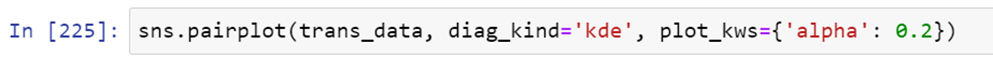

In [82]:
returns=returns.reset_index()
returns=pd.melt(returns,['Date'],['MSFT','GOOG'])
returns['month']=returns['Date'].dt.month
returns['year']=returns['Date'].dt.year

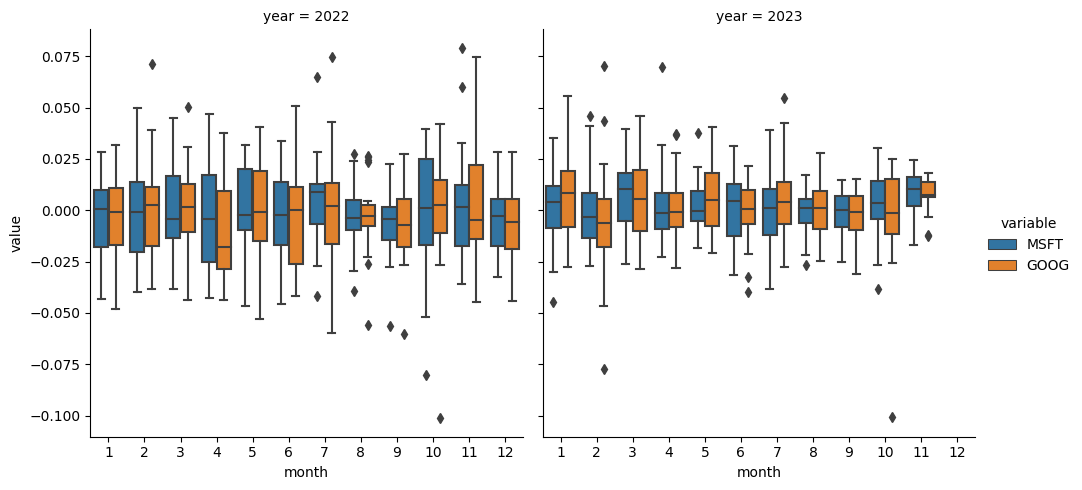

In [85]:
#Create a boxplot that looks like below, using sns.catplot():
sns.catplot(x='month',y='value',data=returns,kind='box',col='year',hue='variable')

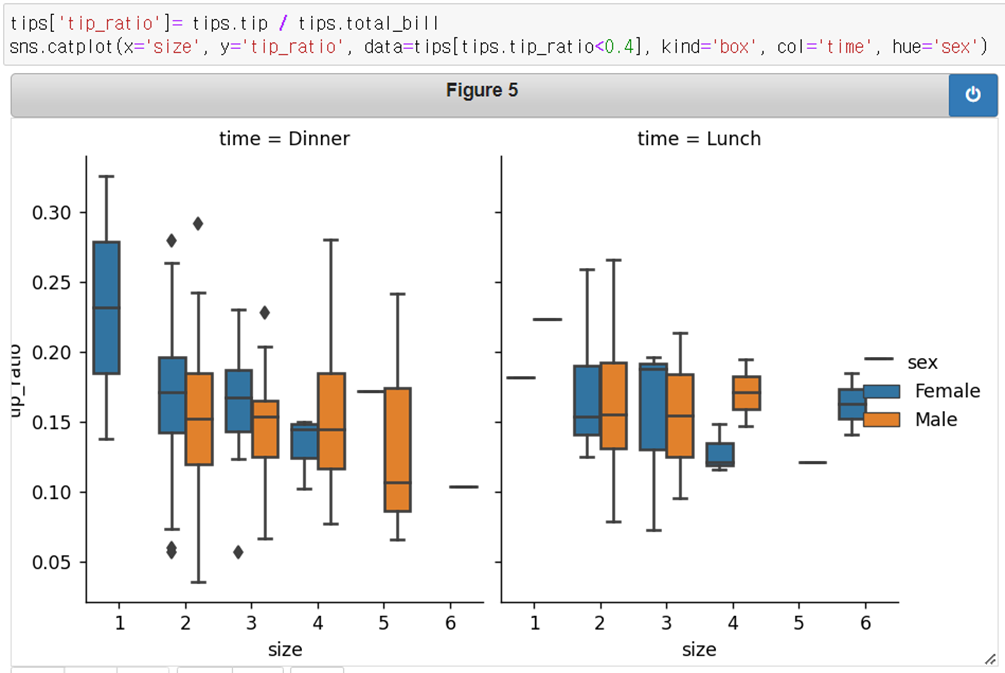